In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [5]:
district_df = pd.read_csv("../data/district_case_comps.csv")
crime_df = pd.read_csv("../data/dstrIPC_1.csv")

In [6]:
crime_df["DISTRICT"] = crime_df["DISTRICT"].str.lower()

In [10]:
crime_df.groupby("YEAR")["TOTAL IPC CRIMES"].mean()

YEAR
2001    4942.201117
2002    4952.239221
2003    4714.615385
2004    5026.090535
2005    4972.993179
2006    5076.467568
2007    5355.781965
2008    5501.653088
2009    5531.538462
2010    5712.017972
2011    5880.088496
2012    5887.023428
Name: TOTAL IPC CRIMES, dtype: float64

In [121]:
crime_df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [122]:
# aggregate crime data for now

In [44]:
crime_df = crime_df[
    (crime_df["DISTRICT"] != "total")&
    (crime_df["YEAR"] > 2010)].groupby(["STATE/UT", "DISTRICT"])[["TOTAL IPC CRIMES","OTHER IPC CRIMES"]].mean().reset_index()

In [45]:
merged_df = district_df.merge(crime_df, left_on="district_name", right_on="DISTRICT", how = "inner")
merged_df

,pc11_state_id,pc11_district_id,state_name,district_name,st_share,sc_share,ptg_share,tot_p,inc_5k_plus_share,disab_share,scav_share,house_type3,ed_prim_share,land_own_share,STATE/UT,DISTRICT,TOTAL IPC CRIMES,OTHER IPC CRIMES
0,1,1,jammu kashmir,kupwara,0.018420,0.000608,0.001132,598707.0,0.273440,0.902448,0.000174,0.001139,0.523096,0.791104,JAMMU & KASHMIR,kupwara,781.5,295.0
1,1,4,jammu kashmir,kargil,0.298980,0.000090,0.011493,110533.0,0.480378,0.900534,0.004285,0.000000,0.543989,0.591850,JAMMU & KASHMIR,kargil,110.5,79.5
2,1,6,jammu kashmir,rajouri,0.128456,0.038889,0.004218,603954.0,0.266523,0.901133,0.000783,0.000326,0.506377,0.947900,JAMMU & KASHMIR,rajouri,1863.0,1340.0
3,1,7,jammu kashmir,kathua,0.033276,0.075045,0.003898,518943.0,0.369915,0.900782,0.010199,0.001487,0.578723,0.668616,JAMMU & KASHMIR,kathua,1212.0,848.0
4,1,10,jammu kashmir,srinagar,0.038159,0.000053,0.000000,16645.0,0.286356,0.900343,0.000000,0.020691,0.468158,0.550060,JAMMU & KASHMIR,srinagar,2685.0,1123.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,33,630,tamil nadu,dharmapuri,0.029023,0.070605,0.010590,210870.0,0.229055,0.900506,0.000070,0.001426,0.444996,0.484355,TAMIL NADU,dharmapuri,3658.0,1706.0
469,33,631,tamil nadu,krishnagiri,0.005238,0.058848,0.002325,279440.0,0.199841,0.900743,0.000012,0.000347,0.479042,0.461178,TAMIL NADU,krishnagiri,4351.0,2244.0
470,33,633,tamil nadu,tiruppur,0.001194,0.088235,0.000054,189929.0,0.188536,0.900495,0.000000,0.000268,0.518408,0.265924,TAMIL NADU,tiruppur,6907.5,3993.0
471,34,635,puducherry,puducherry,0.000000,0.103715,0.000601,270139.0,0.219794,0.900778,0.000651,0.005084,0.699484,0.059630,PUDUCHERRY,puducherry,3551.5,1699.5


In [46]:
merged_df["crime_rate"] = merged_df["TOTAL IPC CRIMES"]/merged_df["tot_p"]
merged_df["other_ipc_rate"] = merged_df["OTHER IPC CRIMES"]/merged_df["tot_p"]

merged_df["other_crime_proportion"] = merged_df["OTHER IPC CRIMES"]/merged_df["TOTAL IPC CRIMES"]

In [18]:
year_summary = merged_df.groupby(["YEAR","DISTRICT"])[["TOTAL IPC CRIMES", "tot_p"]].sum().groupby("YEAR").mean()

10000*year_summary["TOTAL IPC CRIMES"]/year_summary["tot_p"]

YEAR
2001    32.521842
2002    32.302602
2003    30.726631
2004    32.888092
2005    30.486899
2006    29.572571
2007    31.407084
2008    33.020759
2009    33.400662
2010    33.780701
2011    34.905313
2012    35.615621
dtype: float64

In [19]:
features = [
    "tot_p",
    "sc_share", 
    "st_share", 
    "ptg_share", 
    "inc_5k_plus_share",  
    "ed_prim_share",
    "land_own_share",
    "disab_share",
    "house_type3",
]

In [63]:
# analysis_df = merged_df[merged_df["crime_rate"] <= .1][
#     features + ["YEAR","crime_rate", "other_ipc_rate", "other_crime_proportion"]].dropna()
analysis_df = merged_df[merged_df["crime_rate"] <= .1][
    features + ["district_name","crime_rate", "other_ipc_rate", "other_crime_proportion"]].dropna()

In [64]:
def norm(col):
    return (col - col.mean())/col.std()


### Basic correlations

In [22]:
analysis_df.corr()["crime_rate"]

tot_p                    -0.363203
sc_share                  0.134851
st_share                  0.000022
ptg_share                -0.068535
inc_5k_plus_share         0.081442
ed_prim_share             0.015534
land_own_share           -0.046654
disab_share              -0.081999
house_type3              -0.041952
crime_rate                1.000000
other_ipc_rate            0.918235
other_crime_proportion    0.137667
Name: crime_rate, dtype: float64

In [23]:
analysis_df.corr()["other_ipc_rate"]

tot_p                    -0.329278
sc_share                  0.173731
st_share                 -0.075033
ptg_share                -0.076475
inc_5k_plus_share         0.047893
ed_prim_share            -0.011987
land_own_share           -0.054902
disab_share              -0.051474
house_type3              -0.028916
crime_rate                0.918235
other_ipc_rate            1.000000
other_crime_proportion    0.338772
Name: other_ipc_rate, dtype: float64

In [24]:
analysis_df.corr()["other_crime_proportion"]

tot_p                    -0.083055
sc_share                  0.113676
st_share                 -0.145133
ptg_share                -0.022998
inc_5k_plus_share        -0.020086
ed_prim_share            -0.090561
land_own_share            0.078770
disab_share               0.094015
house_type3               0.035133
crime_rate                0.137667
other_ipc_rate            0.338772
other_crime_proportion    1.000000
Name: other_crime_proportion, dtype: float64

## Replication of Gupta et al.

In [36]:
analysis_df[features] = analysis_df[features].apply(norm, axis=0)

test_df = analysis_df[analysis_df["YEAR"] > 2010].copy()

train_df = analysis_df[(analysis_df["YEAR"] <= 2010)&(analysis_df["YEAR"] > 2008)].copy()

In [37]:
X_test = test_df[features]
y_test = np.log(test_df["crime_rate"])
X_train = train_df[features]
y_train = np.log(train_df["crime_rate"])

In [40]:
rf = RandomForestRegressor(n_estimators = 300)

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9585891139162074

In [ ]:
# ^ obvious flaws in methodology: the crime rates don't change very much year to year

### Crime Rate Analysis

In [65]:
X = sm.add_constant(analysis_df[features].apply(norm, axis=0))
y = np.log(analysis_df["crime_rate"])

In [52]:
# caste regression
ols = sm.OLS(y, sm.add_constant(analysis_df[["sc_share"]]))

results = ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     49.50
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           7.58e-12
Time:                        10:59:25   Log-Likelihood:                -635.99
No. Observations:                 444   AIC:                             1276.
Df Residuals:                     442   BIC:                             1284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1344      0.085    -71.868      0.000      -6.302      -5.967
sc_share       9.4733      1.346      7.036      0.000       6.827      12.119
==============================================================================
Omnibus:                       25.327   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.285
Skew:                           0.614   Prob(JB):                     7.21e-07
Kurtosis:                       3.140   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# full features
ols = sm.OLS(y, X)

results = ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     23.39
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.50e-32
Time:                        10:59:27   Log-Likelihood:                -571.77
No. Observations:                 444   AIC:                             1164.
Df Residuals:                     434   BIC:                             1205.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.6388      0.042   -133.935      0.000      -5.722      -5.556
tot_p                -0.5344      0.046    -11.542      0.000      -0.625      -0.443
sc_share              0.2156      0.054      4.006      0.000       0.110       0.321
st_share             -0.2634      0.060     -4.362      0.000      -0.382      -0.145
ptg_share            -0.0315      0.045     -0.694      0.488      -0.121       0.058
inc_5k_plus_share    -0.0269      0.056     -0.485      0.628      -0.136       0.082
ed_prim_share        -0.1307      0.049     -2.662      0.008      -0.227      -0.034
land_own_share       -0.1730      0.045     -3.841      0.000      -0.261      -0.084
disab_share          -0.0257      0.046     -0.555      0.579      -0.117       0.065
house_type3           0.0721      0.045      1.603      0.110      -0.016       0.160
==============================================================================
Omnibus:                       30.416   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.013
Skew:                           0.541   Prob(JB):                     1.24e-09
Kurtosis:                       4.022   Cond. No.                         2.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# try a non-parametric model

In [101]:
rf = RandomForestRegressor(n_estimators = 300)
np.mean(cross_val_score(rf, X, y, scoring="r2"))

0.06481378496915273

In [187]:
y_preds = cross_val_predict(rf, X, y)

<Axes: ylabel='crime_rate'>

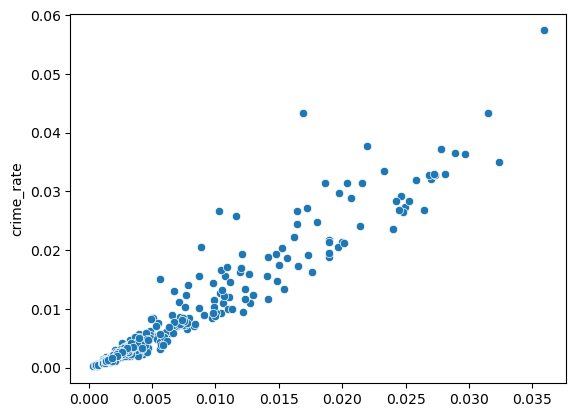

In [103]:
sns.scatterplot(data=analysis_df, y="crime_rate", x = np.exp(rf.predict(X)))

In [102]:
rf.fit(X,y)
pd.DataFrame(zip(X.columns, rf.feature_importances_)).sort_values(1)

,0,1
0,const,0.000000
4,ptg_share,0.037589
5,inc_5k_plus_share,0.040696
9,house_type3,0.047068
8,disab_share,0.051852
6,ed_prim_share,0.079329
3,st_share,0.093754
7,land_own_share,0.114397
2,sc_share,0.173081
1,tot_p,0.362233


In [97]:
residuals = y - rf.predict(X)

In [98]:
residuals.describe()

count    444.000000
mean      -0.000600
std        0.657538
min       -1.799436
25%       -0.414223
50%       -0.031528
75%        0.369608
max        1.960190
Name: crime_rate, dtype: float64

In [92]:
analysis_df["residuals"] = residuals

In [93]:
analysis_df[features + ["residuals"]].corr()["residuals"]

tot_p               -0.095573
sc_share             0.103778
st_share            -0.087593
ptg_share           -0.050184
inc_5k_plus_share   -0.002449
ed_prim_share       -0.049397
land_own_share      -0.166370
disab_share         -0.067506
house_type3          0.041984
residuals            1.000000
Name: residuals, dtype: float64

In [250]:
ls = Lasso(alpha=0.05)

np.mean(cross_val_score(ls, X, y, scoring="r2"))

0.05834955288866037

In [251]:
ls.fit(X, y)
pd.DataFrame(zip(X.columns, ls.coef_)).sort_values(by=1)

,0,1
1,tot_p,-0.438386
3,st_share,-0.190096
7,land_own_share,-0.101251
6,ed_prim_share,-0.068859
0,const,0.000000
4,ptg_share,-0.000000
5,inc_5k_plus_share,-0.000000
8,disab_share,-0.000000
9,house_type3,0.009963
2,sc_share,0.199565


In [191]:
y_preds = cross_val_predict(ls, X, y)

<Axes: ylabel='crime_rate'>

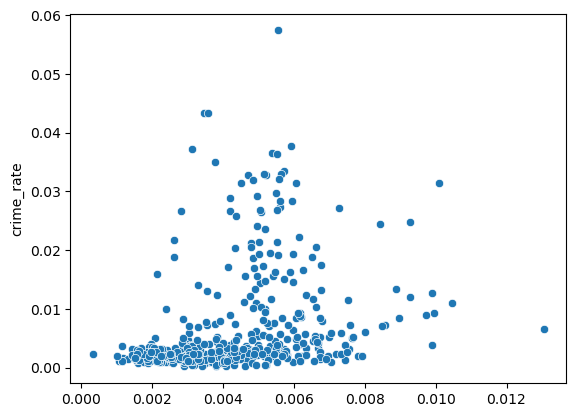

In [193]:
sns.scatterplot(data=analysis_df, y="crime_rate", x = np.exp(y_preds))

### Other IPC Analysis

In [234]:
X = sm.add_constant(analysis_df[features].apply(norm, axis=0))
y = np.log(analysis_df["other_ipc_rate"])

In [195]:

ols = sm.OLS(y, X)

results = ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         other_ipc_rate   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     24.68
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           3.55e-34
Time:                        21:27:09   Log-Likelihood:                -643.10
No. Observations:                 444   AIC:                             1306.
Df Residuals:                     434   BIC:                             1347.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.6813      0.049   -135.145      0.000      -6.778      -6.584
tot_p                -0.6416      0.054    -11.802      0.000      -0.748      -0.535
sc_share              0.2371      0.063      3.751      0.000       0.113       0.361
st_share             -0.3780      0.071     -5.333      0.000      -0.517      -0.239
ptg_share            -0.0512      0.053     -0.963      0.336      -0.156       0.053
inc_5k_plus_share    -0.0806      0.065     -1.237      0.217      -0.209       0.047
ed_prim_share        -0.1451      0.058     -2.517      0.012      -0.258      -0.032
land_own_share       -0.1428      0.053     -2.701      0.007      -0.247      -0.039
disab_share           0.0117      0.054      0.216      0.829      -0.095       0.119
house_type3           0.1025      0.053      1.940      0.053      -0.001       0.206
==============================================================================
Omnibus:                        5.186   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                6.892
Skew:                          -0.036   Prob(JB):                       0.0319
Kurtosis:                       3.606   Cond. No.                         2.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
rf = RandomForestRegressor(n_estimators = 300)
np.mean(cross_val_score(rf, X, y, scoring="r2"))

-0.3014839328199116

In [219]:
y_preds = cross_val_predict(rf, X, y)

<Axes: ylabel='other_ipc_rate'>

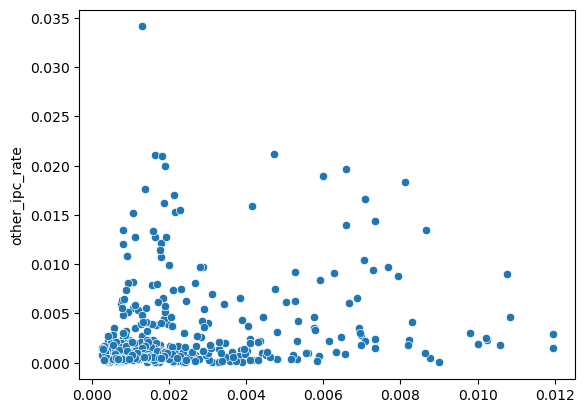

In [220]:
sns.scatterplot(data=analysis_df, y="other_ipc_rate", x = np.exp(y_preds))

In [223]:
rf.fit(X,y)
pd.DataFrame(zip(X.columns, rf.feature_importances_)).sort_values(1)

,0,1
0,const,0.000000
4,ptg_share,0.038716
8,disab_share,0.052791
9,house_type3,0.058785
5,inc_5k_plus_share,0.066347
6,ed_prim_share,0.070755
7,land_own_share,0.093021
3,st_share,0.101090
2,sc_share,0.180570
1,tot_p,0.337926


In [200]:
ls = Lasso(alpha=0.1)

cross_val_score(ls, X, y, scoring="neg_mean_absolute_error")

array([-0.77488174, -0.85147384, -1.24644168, -0.79656473, -1.12662917])

In [201]:
y_preds = cross_val_predict(ls, X, y)

<Axes: ylabel='other_ipc_rate'>

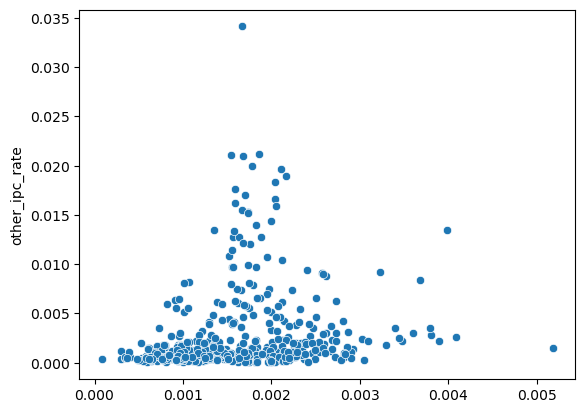

In [202]:
sns.scatterplot(data=analysis_df, y="other_ipc_rate", x = np.exp(y_preds))

In [203]:
ls.fit(X, y)
pd.DataFrame(zip(X.columns, ls.coef_)).sort_values(by=1)

,0,1
1,tot_p,-0.440154
3,st_share,-0.222824
6,ed_prim_share,-0.034508
0,const,0.000000
4,ptg_share,-0.000000
5,inc_5k_plus_share,-0.000000
7,land_own_share,-0.000000
8,disab_share,0.000000
9,house_type3,0.000000
2,sc_share,0.206977


### Srs vs non srs crimes

In [236]:
X = sm.add_constant(analysis_df[features].apply(norm, axis=0))
y = np.log(analysis_df["other_crime_proportion"])

In [237]:

ols = sm.OLS(y, X)

results = ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     other_crime_proportion   R-squared:                       0.131
Model:                                OLS   Adj. R-squared:                  0.113
Method:                     Least Squares   F-statistic:                     7.276
Date:                    Wed, 20 Mar 2024   Prob (F-statistic):           6.96e-10
Time:                            08:07:54   Log-Likelihood:                -240.18
No. Observations:                     444   AIC:                             500.4
Df Residuals:                         434   BIC:                             541.3
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0424      0.020    -52.251      0.000      -1.082      -1.003
tot_p                -0.1072      0.022     -4.888      0.000      -0.150      -0.064
sc_share              0.0215      0.026      0.841      0.401      -0.029       0.072
st_share             -0.1147      0.029     -4.009      0.000      -0.171      -0.058
ptg_share            -0.0198      0.021     -0.921      0.357      -0.062       0.022
inc_5k_plus_share    -0.0537      0.026     -2.043      0.042      -0.105      -0.002
ed_prim_share        -0.0144      0.023     -0.619      0.536      -0.060       0.031
land_own_share        0.0301      0.021      1.413      0.158      -0.012       0.072
disab_share           0.0375      0.022      1.705      0.089      -0.006       0.081
house_type3           0.0304      0.021      1.425      0.155      -0.012       0.072
==============================================================================
Omnibus:                       89.801   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.831
Skew:                          -0.903   Prob(JB):                     2.12e-65
Kurtosis:                       6.583   Cond. No.                         2.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
ls = Lasso(alpha=0.025)

cross_val_score(ls, X, y, scoring="r2")

array([-0.1671462 , -0.26245748, -0.63869939, -0.30252944, -0.43217601])

In [214]:
y_preds = cross_val_predict(ls, X, y)

<Axes: ylabel='other_crime_proportion'>

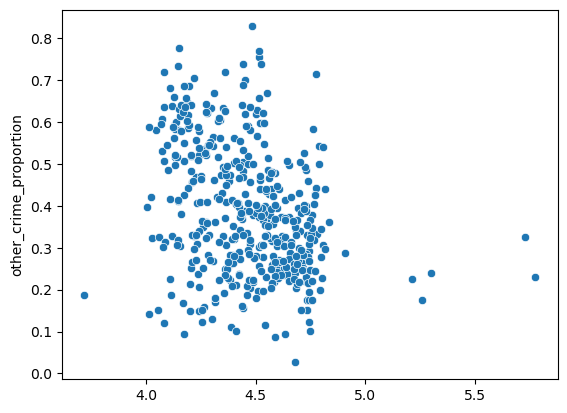

In [215]:
sns.scatterplot(data=analysis_df, y="other_crime_proportion", x = np.exp(y_preds))

In [216]:
ls.fit(X, y)
pd.DataFrame(zip(X.columns, ls.coef_)).sort_values(by=1)

,0,1
1,tot_p,-0.017815
3,st_share,-0.013131
5,inc_5k_plus_share,-0.000002
0,const,0.000000
4,ptg_share,-0.000000
6,ed_prim_share,-0.000000
9,house_type3,0.000000
2,sc_share,0.002554
7,land_own_share,0.002759
8,disab_share,0.005966
